In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
cleaned_data = pd.read_csv('./dataset/cc_cleaned_data.csv')
cleaned_data.head()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,parallel_number,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,0,1290,30619937,2721723523,6,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,1,1192,48666506,3902691720,6,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
2,5,2875,152299974,13405474528,6,0,0,0,1,0,...,0,1,1,0,1,0,0,1,1,0
3,8,1176,50315435,3035348648,6,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
4,9,1180,82981731,9182413424,6,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [3]:
cleaned_data.drop(columns=['parallel_number'],inplace=True)
cleaned_data.head()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,0,1290,30619937,2721723523,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,1,1192,48666506,3902691720,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
2,5,2875,152299974,13405474528,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
3,8,1176,50315435,3035348648,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4,9,1180,82981731,9182413424,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [4]:
cleaned_data.describe()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
count,211.000000,211.000000,2.110000e+02,2.110000e+02,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,175.748815,1736.436019,2.053538e+08,1.170030e+10,0.497630,0.004739,0.018957,0.303318,0.023697,0.127962,...,0.421801,0.578199,0.777251,0.222749,0.492891,0.507109,0.502370,0.497630,0.914692,0.085308
std,103.249575,1667.784393,2.472842e+08,1.591042e+10,0.501183,0.068843,0.136699,0.460784,0.152464,0.334842,...,0.495021,0.495021,0.417081,0.417081,0.501138,0.501138,0.501183,0.501183,0.280004,0.280004
min,0.000000,58.000000,4.452300e+04,1.340438e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.500000,878.000000,3.220423e+07,2.267669e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,178.000000,1397.000000,1.045430e+08,8.195264e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,258.500000,2089.000000,3.061955e+08,1.506873e+10,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,359.000000,14874.000000,1.646861e+09,1.225398e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### lets check the distribution of various numeric features

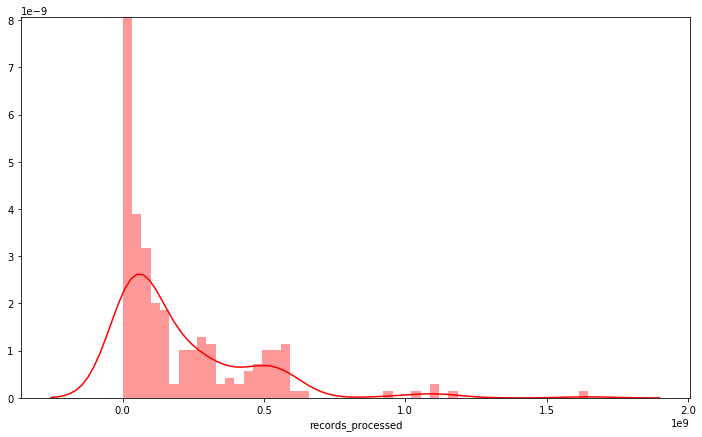

In [5]:

plt.figure(figsize=(12,7))
sns.distplot(cleaned_data['records_processed'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

Let's normalize it

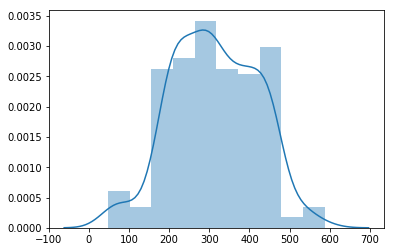

In [6]:
normalized_data,fitted = stats.boxcox(cleaned_data['records_processed'])
sns.distplot(normalized_data)

In [7]:
cleaned_data['records_processed'] = normalized_data

In [8]:
cleaned_data.head()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,0,1290,230.625058,2721723523,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,1,1192,257.280046,3902691720,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
2,5,2875,336.524025,13405474528,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
3,8,1176,259.309607,3035348648,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4,9,1180,291.746795,9182413424,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


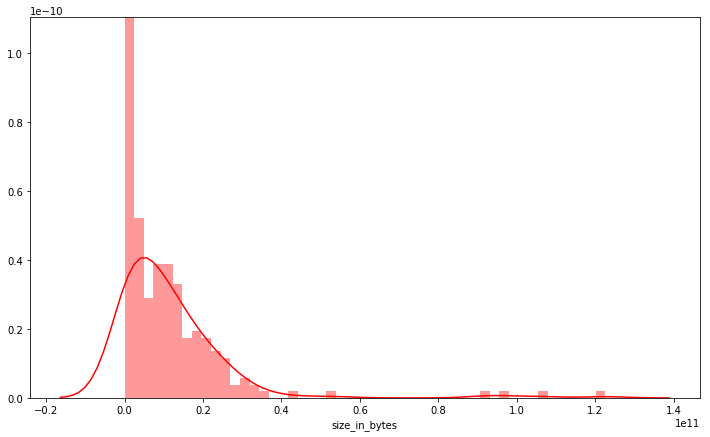

In [9]:
plt.figure(figsize=(12,7))
sns.distplot(cleaned_data['size_in_bytes'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

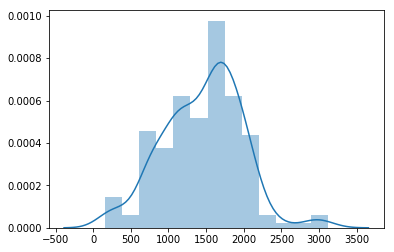

In [10]:
normalized_data,fitted = stats.boxcox(cleaned_data['size_in_bytes'])
sns.distplot(normalized_data)

In [11]:
cleaned_data['size_in_bytes'] = normalized_data

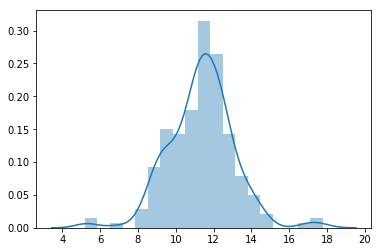

In [12]:
normalized_data,fitted = stats.boxcox(cleaned_data['runtime_in_ms'])
sns.distplot(normalized_data)

In [13]:
cleaned_data['runtime_in_ms'] = normalized_data

In [14]:
y = cleaned_data['runtime_in_ms']
# X = cleaned_data.loc[:, cleaned_data.columns != 'runtime_in_ms']
X = cleaned_data[['records_processed','size_in_bytes','use_exclusive_locks_X','use_exclusive_locks_0']]

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
X_train_poly = poly_reg.fit_transform(X_train)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(X_train_poly,y_train)
y_pred=linear.predict(poly_reg.fit_transform(X_test))
print(r2_score(y_test,y_pred))

0.695294231970498


In [43]:
linear.score(poly_reg.fit_transform(X_test),y_test)

0.695294231970498

### R2 Score = 0.695294231970498
### That is it correctly predicts the right runtime __69.5 %__ of the times

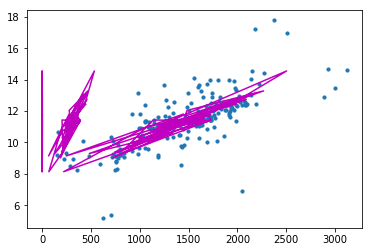

In [39]:
plt.scatter(X.size_in_bytes ,y,s=10)
plt.plot(X_test,y_pred,color= 'm')
plt.show()

(43,)